In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw_data.csv")
df.head()
df.columns
df.shape
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   subject   18539 non-null  str  
 1   body      19998 non-null  str  
 2   answer    19996 non-null  str  
 3   type      20000 non-null  str  
 4   queue     20000 non-null  str  
 5   priority  20000 non-null  str  
 6   language  20000 non-null  str  
 7   tag_1     20000 non-null  str  
 8   tag_2     19954 non-null  str  
 9   tag_3     19905 non-null  str  
 10  tag_4     18461 non-null  str  
 11  tag_5     13091 non-null  str  
 12  tag_6     7351 non-null   str  
 13  tag_7     3928 non-null   str  
 14  tag_8     1907 non-null   str  
dtypes: str(15)
memory usage: 2.3 MB


In [2]:
df_work = df.copy() ##for data cleaning and manipulation
##Selecting only the relevant columns for operations analysis
df_ops = df_work[
    ["type", "queue", "priority", "language", "tag_1", "tag_2"]
].copy()

df_ops.head()

,type,queue,priority,language,tag_1,tag_2
0,Incident,General Inquiry,low,de,Crash,Technical
1,Request,Customer Service,medium,en,Feedback,Sales
2,Request,Customer Service,medium,en,Technical,Product
3,Incident,Customer Service,high,de,Security,Breach
4,Request,Customer Service,medium,en,Security,Customer


In [3]:
##replace missing values in tag_2 with "None"
df_ops["tag_2"] = df_ops["tag_2"].fillna("None")
##Verify that there are no more missing values in tag_2
df_ops.isnull().sum()

type        0
queue       0
priority    0
language    0
tag_1       0
tag_2       0
dtype: int64

In [4]:
##New dataset with only the relevant columns for operations analysis
df_ops.to_csv("../data/cleaned_data.csv", index=False)

In [5]:
##Load the cleaned dataset for analysis
df_analysis = pd.read_csv("../data/cleaned_data.csv")
##verify the loaded dataset
df_analysis.head()

,type,queue,priority,language,tag_1,tag_2
0,Incident,General Inquiry,low,de,Crash,Technical
1,Request,Customer Service,medium,en,Feedback,Sales
2,Request,Customer Service,medium,en,Technical,Product
3,Incident,Customer Service,high,de,Security,Breach
4,Request,Customer Service,medium,en,Security,Customer


In [6]:
#which priority level has the most tickets?
df_analysis["priority"].value_counts()

#which queue(Team) has the most tickets?
df_analysis["queue"].value_counts()

#Which problems are most common?
df_analysis["type"].value_counts()

#which languages are most common?
df_analysis["language"].value_counts()

language
en    11923
de     8077
Name: count, dtype: int64

In [7]:
#Summary of distributions
print("Priority Distribution:\n", df_analysis["priority"].value_counts(), "\n")

print("Queue Distribution:\n", df_analysis["queue"].value_counts(), "\n")

print("Type Distribution:\n", df_analysis["type"].value_counts(), "\n")

print("Language Distribution:\n", df_analysis["language"].value_counts())

Priority Distribution:
 priority
medium    8144
high      7801
low       4055
Name: count, dtype: int64 

Queue Distribution:
 queue
Technical Support                  5824
Product Support                    3708
Customer Service                   3152
IT Support                         2292
Billing and Payments               2086
Returns and Exchanges              1001
Service Outages and Maintenance     764
Sales and Pre-Sales                 572
Human Resources                     338
General Inquiry                     263
Name: count, dtype: int64 

Type Distribution:
 type
Incident    7978
Request     5763
Problem     4184
Change      2075
Name: count, dtype: int64 

Language Distribution:
 language
en    11923
de     8077
Name: count, dtype: int64


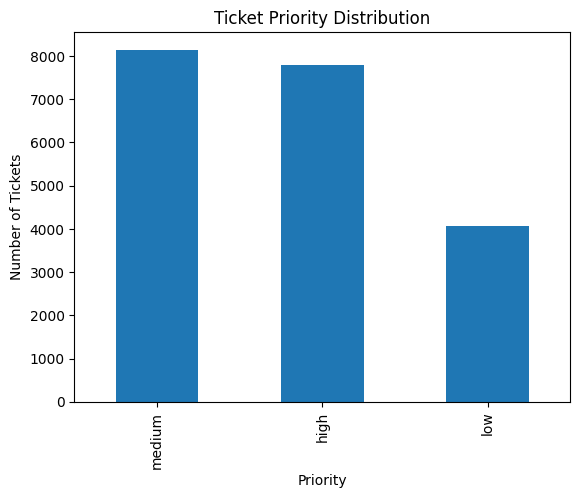

In [8]:
##Plots the priority distribution as a bar chart
df_analysis["priority"].value_counts().plot(kind="bar")

plt.title("Ticket Priority Distribution")
plt.xlabel("Priority")
plt.ylabel("Number of Tickets")


plt.savefig("../visuals/priority_distribution.png")
plt.show()

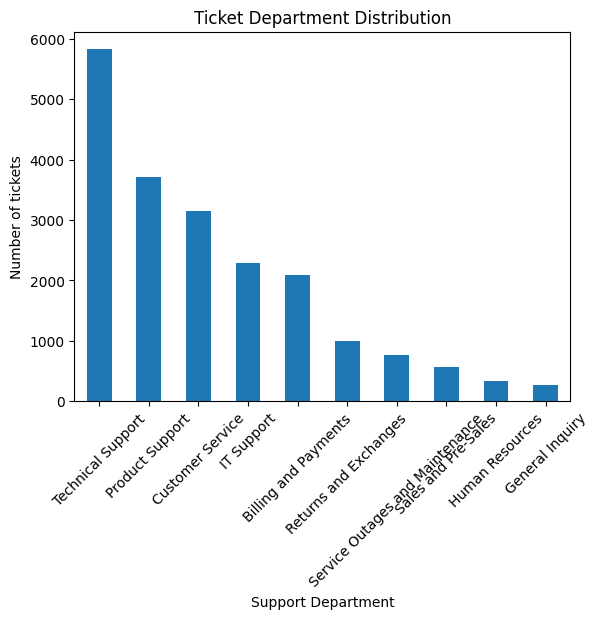

In [9]:
df_analysis["queue"].value_counts().plot(kind="bar")

plt.title("Ticket Department Distribution")
plt.xlabel("Support Department")
plt.ylabel("Number of tickets")

plt.xticks(rotation=45)
plt.savefig("../visuals/queue_distribution.png")
plt.show()

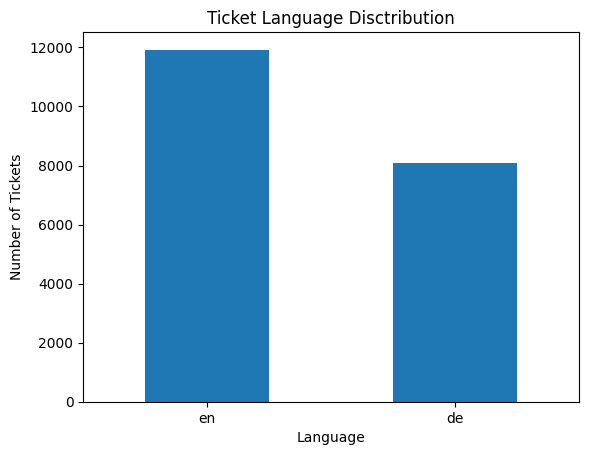

In [10]:
df_analysis["language"].value_counts().plot(kind="bar")

plt.title("Ticket Language Disctribution")
plt.xlabel("Language")
plt.ylabel("Number of Tickets")

plt.xticks(rotation=0)
plt.savefig("../visuals/language_distribution.png")
plt.show()

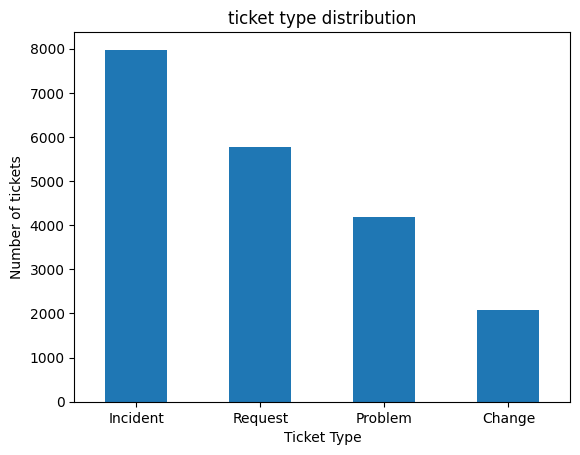

In [11]:
df_analysis["type"].value_counts().plot(kind="bar")
plt.title("ticket type distribution")

plt.xlabel("Ticket Type")
plt.ylabel("Number of tickets")

plt.xticks(rotation=0)
plt.savefig("../visuals/type_distribution.png")
plt.show()

In [16]:
print("----Key Opertional KPIs----")

print("Total Tickets:", len(df_analysis))
print("High Priority Tickets:", (df_analysis["priority"] == "high").sum())
print("Medium Priority Tickets:", (df_analysis["priority"] == "medium").sum())
print("Low Priority Tickets:", (df_analysis["priority"] == "low").sum())

print("\nTop Support Team:")
print(df_analysis["queue"].value_counts().head(1))

----Key Opertional KPIs----
Total Tickets: 20000
High Priority Tickets: 7801
Medium Priority Tickets: 8144
Low Priority Tickets: 4055

Top Support Team:
queue
Technical Support    5824
Name: count, dtype: int64


## 📌 Executive Summary

This analysis explored 20,000 customer support tickets to understand operational workload and support performance.

### Key Findings:
- Medium and High priority tickets dominate, indicating sustained operational pressure.
- Technical Support handles the largest ticket volume, suggesting potential workload imbalance.
- Incident-type issues are most frequent, showing a reactive support environment.
- Customer support operations are multilingual, requiring English and German support coverage.

### Business Impact:
- Helps identify overloaded support teams.
- Supports priority-based resource planning.
- Provides KPI-ready insights for dashboard reporting and operational decision-making.